In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.metrics import accuracy_score

In [42]:
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]
 [ 0.62835793  4.4601363 ]
 [ 1.68608568  0.65828448]
 [ 1.18454506  5.28042636]
 [ 0.06897171  4.35573272]
 [ 1.78726415  1.70012006]
 [ 4.4384123   1.84214315]
 [ 3.18190344 -0.18226785]
 [ 0.30380963  3.94423417]
 [ 0.73936011  0.43607906]
 [ 1.28535145  1.43691285]
 [ 1.1312175   4.68194985]
 [ 0.66471755  4.35995267]
 [ 1.31570453  2.44067826]
 [-0.18887976  5.20461381]
 [ 2.57854418  0.72611733]
 [ 0.87305123  4.71438583]
 [ 1.3105127   0.07122512]
 [ 0.9867701   6.08965782]
 [ 1.42013331  4.63746165]
 [ 2.3535057   2.22404956]
 [ 2.43169305 -0.20173713]
 [ 1.0427873   4.60625923]
 [ 0.95088418  0.94982874]
 [ 2.45127423 -0.19539785]
 [ 1.62011397  2.74692739]
 [ 2.15504965  4.12386249]
 [ 1.38093486  0.92949422]
 

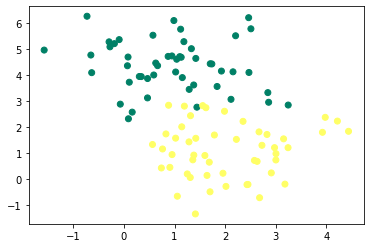

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
print(X)
print(X.shape[0])
print(X[0].shape)
print(y)
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0],X[:, 1],c=y , cmap ='summer')
plt.show()

In [3]:
#take a parameters X and return W,b 
def Initialisation(X):
    W = np.random.rand(X.shape[1],1)
    b = np.random.rand(1)
    return (W,b) 

In [4]:
def Model(X,W,b):
    Z = X.dot(W) + b 
    #print(Z.max())
    #print("Z shape is", Z.shape)
    A = 1/(1+np.exp(-Z))
    return A

In [5]:
def Cost(A,y):
    epsilon =1e-15
    return 1 / len(y) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon))                  

In [6]:
def gradients(A, X, y):
    m=len(y)
    dW= 1 / m * np.dot(X.T, A-y) 
    db= 1 / m * np.sum(A-y)
    return (dW,db) 
    

In [7]:
def Update(W,b,dW,db, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

In [8]:
def predict(X, W, b):
    A = Model(X, W, b)
    return A >= 0.5

In [9]:
from tqdm import tqdm 

In [68]:
def artificial_neuron(X_train, Y_train,learning_rate=0.1 ,n_iter =100):
    W,b = Initialisation(X_train)
    train_loss=[]
    train_acc = []
    for i in tqdm(range(n_iter)): 
        A = Model(X_train,W,b)
        
        if i%10 == 0:    
            
            train_loss.append(Cost(A,Y_train))
            Ytrain_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(Y_train, Ytrain_pred))
            
        dW ,db = gradients(A, X_train, Y_train)
        W, b = Update(W,b,dW,db,learning_rate)
        
    y_pred = predict(X_train, W, b)
    print(accuracy_score(Y_train, y_pred))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.plot(train_loss , label = 'train_loss')
    plt.subplot(1,2,2)
    plt.plot(train_acc , label = 'train_acc')
    plt.show()
    
    return (W, b)

In [62]:
def artificial_neuron3(X_train, Y_train, X_test, Y_test, learning_rate=0.1 ,n_iter =100):
    W,b = Initialisation(X_train)
    train_loss=[]
    train_acc = []
    test_loss=[]
    test_acc= []
    for i in tqdm(range(n_iter)): 
        A = Model(X_train,W,b)
        if i%10 == 0:    
            
            train_loss.append(Cost(A,Y_train))
            Ytrain_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(Y_train, Ytrain_pred))
            
            A_test = Model(X_test, W ,b)
            test_loss.append(Cost(A_test,Y_test))
            Ytest_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(Y_test, Ytest_pred))
            
            
        dW ,db = gradients(A, X_train, Y_train)
        W, b = Update(W,b,dW,db,learning_rate)
        
    #y_pred = predict(X, W, b)
    #print(accuracy_score(Y, y_pred))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.plot(train_loss , label = 'train_loss')
    plt.plot(test_loss , label = 'test_loss')
    plt.subplot(1,2,2)
    plt.plot(train_acc , label = 'train_acc')
    plt.plot(test_acc , label = 'test_acc')
    plt.show()
    
    return (W, b)
#(1000, 4096)
#(1000, 1)

In [11]:
def artificial_neuron2(X, y, learning_rate=0.1 ,n_iter =1000):
    W,b = Initialisation(X)
    W[0], W[1] = -7.5, -7.5
    nb = 10
    j = 0
    history = np.zeros((n_iter // nb, 5))
    Loss=[]
    
    # Training 
    for i in range(n_iter): 
        A = Model(X,W,b)
        Loss.append(Cost(A,y))
        dW ,db = gradients(A, X, y)
        W, b = Update(W,b,dW,db, learning_rate)
        if( i % nb == 0):
            history[j, 0]= W[0]
            history[j, 1]= W[1]
            history[j, 2]= b
            history[j, 3]= i
            history[j, 4]= Cost(A,y)
            j+=1
    plt.plot(Loss)
    plt.show()
    
    return (history, b)

100%|██████████| 100/100 [00:00<00:00, 16073.83it/s]

0.9


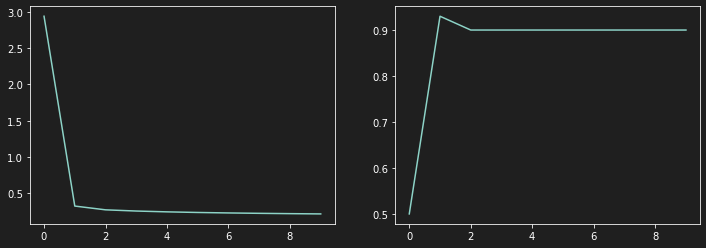

In [69]:
W, b = artificial_neuron(X, y)

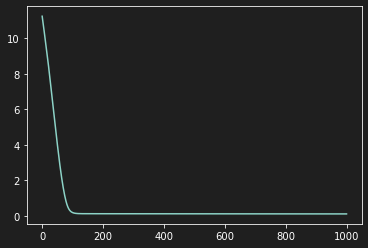

In [57]:
history, b1=artificial_neuron2(X, y)

In [14]:
W, b

(array([[ 1.07594585],
        [-1.03429635]]),
 array([0.74964746]))

In [70]:
x0_plant2 = 1.2
print( (-W[0]*x0_plant2 - b)/W[1] )

[2.06527727]


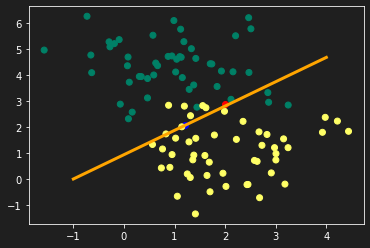

In [71]:
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0 - b)/W[1]

new_plant2 = np.array([1.2,2.08588668])
plt.scatter(new_plant2[0] ,new_plant2[1] , c= 'b')
new_plant = np.array([2, 2.9])
plt.scatter(X[:, 0],X[:, 1],c=y , cmap ='summer')
plt.scatter(new_plant[0], new_plant[1] , c='r' )
plt.plot(x0,  x1,c='orange', lw=3)
plt.show()

In [39]:
#Vert->false 
#Jaune->true 
new_plant3= np.array([0,4])
print(predict(new_plant3, W, b))
print(predict(new_plant, W, b))
print(predict(new_plant2, W, b))

[False]
[False]
[ True]


In [72]:
print(W)
print(W[0])

[[ 1.06037132]
 [-1.13686457]]
[1.06037132]


In [73]:
1- 11/100

0.89

In [74]:
#!pip install h5py 
from utilities import *

In [21]:
X_train, Y_train, X_test, Y_test = load_data()
print(X_train.shape)
#print (X_train)
print(Y_train.shape)
print(np.unique(Y_train, return_counts=True))


(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


/home/ichiro19/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


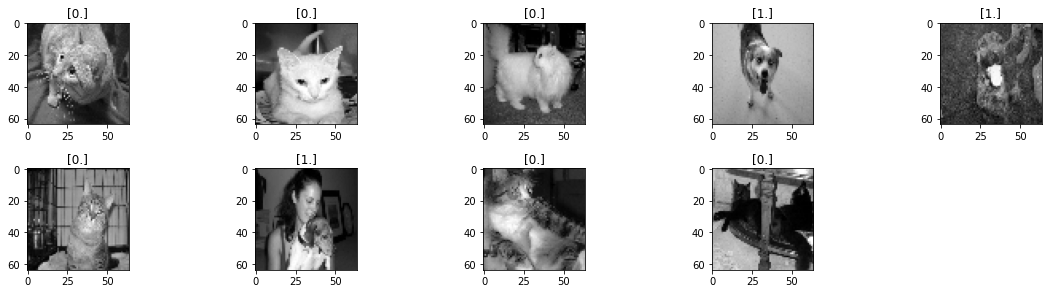

In [22]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
    plt.tight_layout()
    
plt.show()    
    

In [23]:
X_test.shape


(200, 64, 64)

In [24]:
print(X_train.shape)
print(64*64*1000)

(1000, 64, 64)
4096000


In [25]:
X_trainreshaped = X_train.reshape(X_train.shape[0],-1)
X_train_normalized = X_trainreshaped/ 254

In [26]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)/X_train.max()
X_test_reshape.shape

(200, 4096)

In [27]:
print(X_trainreshaped.shape)
print(X_train_normalized.shape)

(1000, 4096)
(1000, 4096)


100%|██████████| 10000/10000 [00:40<00:00, 247.98it/s]


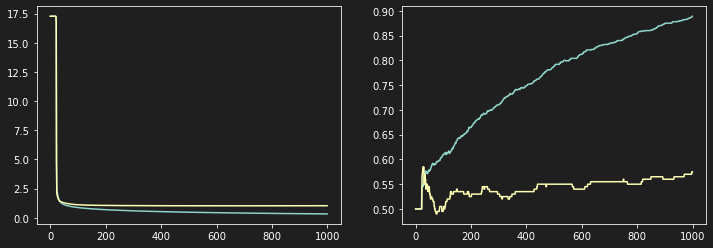

In [77]:
W, b= artificial_neuron3(X_train_normalized, Y_train, X_test_reshape , Y_test , learning_rate=0.01, n_iter=10000)

100%|██████████| 10000/10000 [00:39<00:00, 254.16it/s]


0.897


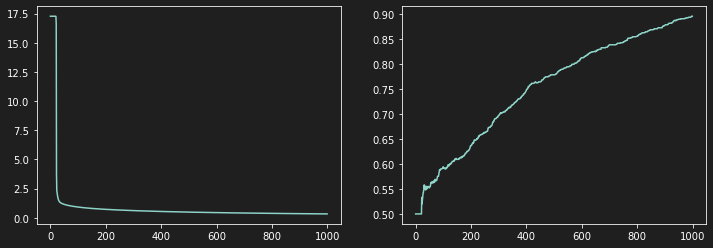

In [78]:
W, b= artificial_neuron(X_train_normalized, Y_train, learning_rate=0.01, n_iter=10000)

In [29]:
#print(X)
print(X_train)
print(X_train.shape)
wtest = np.random.rand(X.shape[1],1)
btest = np.random.rand(1)
print(wtest,btest)

[[[164 174 163 ... 144 131 134]
  [162 174 182 ... 143 144 128]
  [158 169 187 ... 158 143 151]
  ...
  [175 168 166 ...  91 176 173]
  [167 166 166 ...  45 184 124]
  [176 172 168 ...  87 180  39]]

 [[ 42  43  39 ...  47  46  42]
  [ 38  44  42 ...  40  47  42]
  [ 45  46  36 ...  43  40  38]
  ...
  [ 87  85  70 ...  75  78  82]
  [ 70  70  71 ...  52  67  68]
  [ 64  61  60 ...  55  52  55]]

 [[ 27  26  29 ...  84  82  84]
  [ 29  27  28 ...  89  88  89]
  [ 28  32  27 ...  88  90  86]
  ...
  [101  92  17 ... 112 119 123]
  [173 178 175 ... 141 137 138]
  [ 10  11  26 ... 135 141 121]]

 ...

 [[ 47  68 142 ...  39  35  33]
  [ 55  68 159 ...  54  41  44]
  [ 58  75 141 ...  40  58  63]
  ...
  [163 169 167 ... 206 212 207]
  [168 165 167 ... 209 205 198]
  [167 168 167 ... 202 202 203]]

 [[252 252 252 ... 158 171 173]
  [252 252 252 ... 151 163 166]
  [252 252 252 ... 142 155 164]
  ...
  [215 203 185 ...  52  57  67]
  [209 214 204 ...  66  59  58]
  [200 210 222 ...  64  66  

In [30]:
lim =10
h=100
W1 = np.linspace(-lim,lim, h)
W2 = np.linspace(-lim,lim, h)

W11, W22 = np.meshgrid(W1,W2)
print(W1)
print('W1 shape is', W1.shape)
#print(W2)
print('toto')
print(W11)
print('W11 shape is', W11.shape)
#print('aplatir W11')
#print(W11.ravel())
print('titi')
print(W22)
#print('aplatir W22')
#print(W22.ravel())
#print(W22.shape)
#print (W22.ravel().shape)

W_final = np.c_[W11.ravel(), W22.ravel()].T
print(W_final.shape)
print(W_final)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [79]:
b=0 
Z = X.dot(W_final)+b
print(Z)
A = 1 /(1 +np.exp(-Z))
A.shape
epsilon =1e-15
L = (1 / len(y)) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon), axis=0).reshape(W11.shape) 
L.shape

[[-64.5269508  -63.67472788 -62.82250495 ...  62.82250495  63.67472788
   64.5269508 ]
 [-13.67642484 -13.49303113 -13.30963742 ...  13.30963742  13.49303113
   13.67642484]
 [-48.04752402 -48.10338771 -48.1592514  ...  48.1592514   48.10338771
   48.04752402]
 ...
 [-39.8990323  -39.29202455 -38.68501681 ...  38.68501681  39.29202455
   39.8990323 ]
 [-34.53419278 -34.66300647 -34.79182016 ...  34.79182016  34.66300647
   34.53419278]
 [-25.71858639 -25.55094356 -25.38330073 ...  25.38330073  25.55094356
   25.71858639]]


(100, 100)

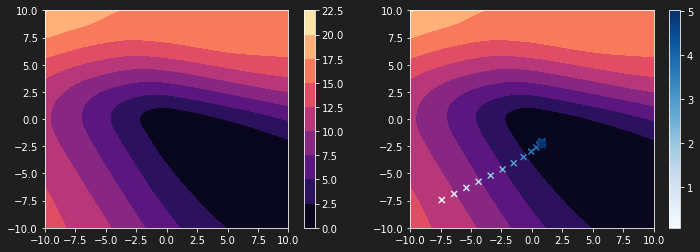

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, cmap='magma')
plt.scatter(history[:,0], history[:, 1], c=history[:,2], cmap ='Blues', marker ='x')
plt.colorbar()

In [33]:
#Normalization 
# X = X - Xmin / Xmax - Xmin 
#overfitting : 
#reduire le nombre de variables 
#rajouter plus de données 
#technique de régularisation 